Star (Y) Connection:
Line Voltage (V): 398.37
Phase Voltage (V): 230.00
Line Current (A): 18.12
Phase Current (A): 18.12

Delta (Δ) Connection:
Line Voltage (V): 398.37
Phase Voltage (V): 398.37
Line Current (A): 18.12
Phase Current (A): 10.46


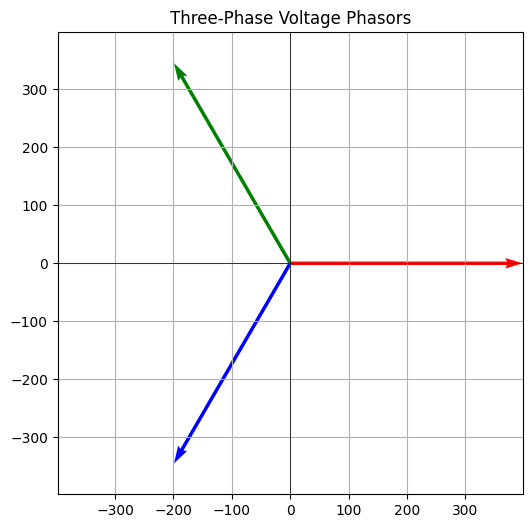

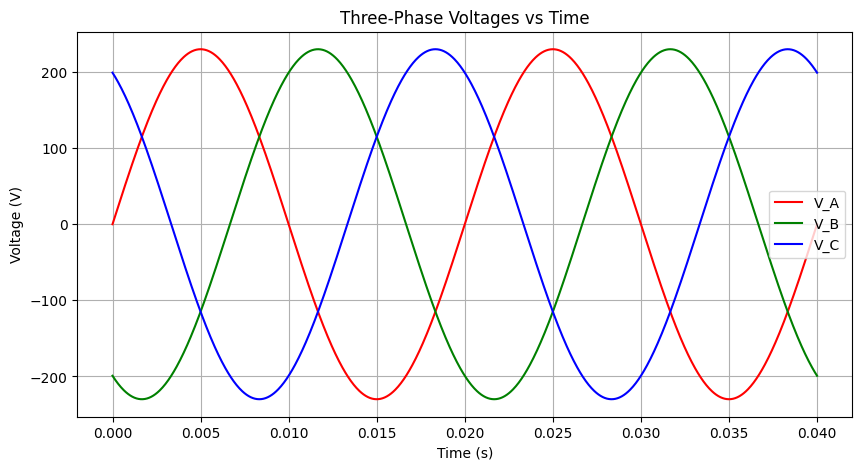

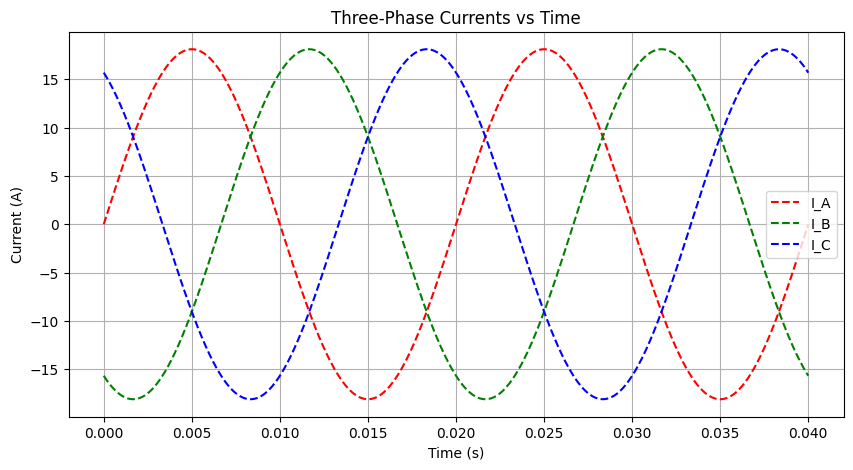

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
V_phase = 230  # Phase voltage (V)
P_total = 10e3  # Total power (W)
PF = 0.8  # Power factor (lagging)
freq = 50  # Frequency (Hz)
omega = 2 * np.pi * freq  # Angular frequency
time = np.linspace(0, 0.04, 1000)  # Time vector for one cycle

# Star (Y) Connection
V_line_Y = V_phase * np.sqrt(3)  # Line voltage in star connection
I_phase_Y = P_total / (3 * V_phase * PF)  # Phase current in star connection
I_line_Y = I_phase_Y  # Line current in star connection

# Delta (Δ) Connection
V_phase_D = V_line_Y  # Phase voltage in delta connection
I_phase_D = P_total / (3 * V_phase_D * PF)  # Phase current in delta connection
I_line_D = I_phase_D * np.sqrt(3)  # Line current in delta connection

# Display results
print("Star (Y) Connection:")
print(f"Line Voltage (V): {V_line_Y:.2f}")
print(f"Phase Voltage (V): {V_phase:.2f}")
print(f"Line Current (A): {I_line_Y:.2f}")
print(f"Phase Current (A): {I_phase_Y:.2f}\n")

print("Delta (Δ) Connection:")
print(f"Line Voltage (V): {V_line_Y:.2f}")
print(f"Phase Voltage (V): {V_phase_D:.2f}")
print(f"Line Current (A): {I_line_D:.2f}")
print(f"Phase Current (A): {I_phase_D:.2f}")

# Phasor diagram representation
angles = np.array([0, 120, -120])
phasors = V_line_Y * np.exp(1j * np.radians(angles))

# Correct the quiver plot by specifying starting points for each vector
origin_x = np.zeros(len(phasors))
origin_y = np.zeros(len(phasors))

plt.figure(figsize=(6,6))
plt.quiver(origin_x, origin_y, phasors.real, phasors.imag, angles='xy', scale_units='xy', scale=1, color=['r', 'g', 'b'])
plt.xlim(-V_line_Y, V_line_Y)
plt.ylim(-V_line_Y, V_line_Y)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Three-Phase Voltage Phasors")
plt.grid()
plt.show()

# Voltage and current waveforms
V_A = V_phase * np.sin(omega * time)
V_B = V_phase * np.sin(omega * time - 2*np.pi/3)
V_C = V_phase * np.sin(omega * time + 2*np.pi/3)

I_A = I_phase_Y * np.sin(omega * time)
I_B = I_phase_Y * np.sin(omega * time - 2*np.pi/3)
I_C = I_phase_Y * np.sin(omega * time + 2*np.pi/3)

plt.figure(figsize=(10,5))
plt.plot(time, V_A, label='V_A', color='r')
plt.plot(time, V_B, label='V_B', color='g')
plt.plot(time, V_C, label='V_C', color='b')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("Three-Phase Voltages vs Time")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(time, I_A, label='I_A', color='r', linestyle='--')
plt.plot(time, I_B, label='I_B', color='g', linestyle='--')
plt.plot(time, I_C, label='I_C', color='b', linestyle='--')
plt.xlabel("Time (s)")
plt.ylabel("Current (A)")
plt.title("Three-Phase Currents vs Time")
plt.legend()
plt.grid()
plt.show()